In [1]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 28.3 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Normalization
from keras.optimizers import SGD, Adam
from keras.optimizers.schedules.learning_rate_schedule import CosineDecay, CosineDecayRestarts, ExponentialDecay
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
from tensorflow_addons.optimizers import AdamW
%config InlineBackend.figure_format = 'retina'



170498071/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data() 
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

def prep_pixels_layer(train, test, layer_norm):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = layer_norm(train_norm)
    test_norm = layer_norm(test_norm)
    # return normalized images
    return train_norm, test_norm

def summarize_diagnostics(history, prefix):
    # plot loss
    plt.subplots(1,1)
    plt.ylabel('Cross Entropy Loss')
    plt.xlabel('Epochs')
    plt.plot(history.history['loss'], color='blue', label='Train loss')
    plt.plot(history.history['val_loss'], color='orange', label='Validation loss')
    filename = prefix + 'loss.png'
    plt.legend()
    plt.savefig(filename)
    plt.close()
    # plot accuracy
    plt.subplots(1,1)
    plt.ylabel('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='Train accuracy')
    plt.plot(history.history['val_accuracy'], color='orange', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    # save plot to file
    filename = prefix + 'accuracy.png'
    plt.savefig(filename)
    plt.close()

def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# Vanilla model

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# fit model
history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/30
782/782 [==============================] - 8s 9ms/step - loss: 1.7515 - accuracy: 0.3659 - val_loss: 1.4184 - val_accuracy: 0.4866
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 1.3491 - accuracy: 0.5186 - val_loss: 1.2570 - val_accuracy: 0.5559
Epoch 3/30
782/782 [==============================] - 6s 8ms/step - loss: 1.1748 - accuracy: 0.5842 - val_loss: 1.1638 - val_accuracy: 0.5923
Epoch 4/30
782/782 [==============================] - 6s 8ms/step - loss: 1.0531 - accuracy: 0.6316 - val_loss: 1.0289 - val_accuracy: 0.6350
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 0.9603 - accuracy: 0.6663 - val_loss: 0.9854 - val_accuracy: 0.6507
Epoch 6/30
782/782 [==============================] - 6s 8ms/step - loss: 0.8836 - accuracy: 0.6923 - val_loss: 0.9490 - val_accuracy: 0.6686
Epoch 7/30
782/782 [==============================] - 6s 8ms/step - loss: 0.8077 - accuracy: 0.7190 - val_loss: 0.9413 - val_accuracy: 0.6732
Epoch 

In [ ]:
prefix = 'figures/vanilla_vgg_no_reg/' + str(acc)[:4]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

# Perform dropout

In [ ]:
def define_model_dropout():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_dropout()
# fit model
history = model.fit(trainX, trainY, epochs=80, batch_size=64, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves

Epoch 1/80
782/782 [==============================] - 7s 9ms/step - loss: 2.0173 - accuracy: 0.2482 - val_loss: 1.7423 - val_accuracy: 0.3685
Epoch 2/80
782/782 [==============================] - 6s 8ms/step - loss: 1.6620 - accuracy: 0.3895 - val_loss: 1.4909 - val_accuracy: 0.4530
Epoch 3/80
782/782 [==============================] - 6s 8ms/step - loss: 1.5219 - accuracy: 0.4406 - val_loss: 1.3677 - val_accuracy: 0.5083
Epoch 4/80
782/782 [==============================] - 6s 8ms/step - loss: 1.4197 - accuracy: 0.4838 - val_loss: 1.2838 - val_accuracy: 0.5369
Epoch 5/80
782/782 [==============================] - 6s 8ms/step - loss: 1.3331 - accuracy: 0.5163 - val_loss: 1.2205 - val_accuracy: 0.5592
Epoch 6/80
782/782 [==============================] - 6s 8ms/step - loss: 1.2541 - accuracy: 0.5467 - val_loss: 1.1460 - val_accuracy: 0.5913
Epoch 7/80
782/782 [==============================] - 6s 8ms/step - loss: 1.1966 - accuracy: 0.5710 - val_loss: 1.1146 - val_accuracy: 0.5991
Epoch 

In [ ]:
prefix = 'figures/vanilla_vgg_dropout/' + str(acc)[:4]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

# Perform weight decay

In [ ]:
def define_model_wd():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_wd()
# fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves

Epoch 1/50
782/782 [==============================] - 8s 9ms/step - loss: 2.8932 - accuracy: 0.3643 - val_loss: 2.6490 - val_accuracy: 0.4465
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 2.5213 - accuracy: 0.4933 - val_loss: 2.4105 - val_accuracy: 0.5289
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 2.3361 - accuracy: 0.5528 - val_loss: 2.2418 - val_accuracy: 0.5854
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 2.1781 - accuracy: 0.6038 - val_loss: 2.1380 - val_accuracy: 0.6096
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 2.0523 - accuracy: 0.6388 - val_loss: 2.0139 - val_accuracy: 0.6497
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 1.9440 - accuracy: 0.6722 - val_loss: 2.0251 - val_accuracy: 0.6393
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 1.8477 - accuracy: 0.6973 - val_loss: 1.8990 - val_accuracy: 0.6788
Epoch 

In [ ]:
prefix = 'figures/vanilla_vgg_wd/' + str(acc)[:4]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

# Perform Data augmentation

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=80, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/80
781/781 [==============================] - 28s 35ms/step - loss: 1.8067 - accuracy: 0.3445 - val_loss: 1.4504 - val_accuracy: 0.4751
Epoch 2/80
781/781 [==============================] - 25s 32ms/step - loss: 1.4768 - accuracy: 0.4649 - val_loss: 1.3243 - val_accuracy: 0.5325
Epoch 3/80
781/781 [==============================] - 25s 32ms/step - loss: 1.3454 - accuracy: 0.5171 - val_loss: 1.2096 - val_accuracy: 0.5686
Epoch 4/80
781/781 [==============================] - 26s 33ms/step - loss: 1.2348 - accuracy: 0.5574 - val_loss: 1.1284 - val_accuracy: 0.5964
Epoch 5/80
781/781 [==============================] - 25s 32ms/step - loss: 1.1552 - accuracy: 0.5892 - val_loss: 1.0860 - val_accuracy: 0.6243
Epoch 6/80
781/781 [==============================] - 26s 33ms/step - loss: 1.0881 - accuracy: 0.6145 - val_loss: 0.9811 - val_accuracy: 0.6536
Epoch 7/80
781/781 [==============================] - 25s 32ms/step - loss: 1.0277 - accuracy: 0.6371 - val_loss: 0.9359 - val_accuracy:

In [ ]:
prefix = 'figures/vanilla_vgg_data_augmentation/' + str(max(history.history['val_accuracy']))[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

# Model with dropout, batchnorm and data augmentation

In [ ]:
def define_model_dropout_bn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

class StopOnPoint(Callback):
    def __init__(self, threshold):
        super(StopOnPoint, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

callbacks = [StopOnPoint(0.88)]


In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pi
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_dropout_bn()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks=callbacks)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

In [ ]:
prefix = 'figures/vanilla_vgg_bn_dropout_da/' + str(acc)[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

# Normalizing the data to have zero mean and standard deviation 1 

In [ ]:
callbacks = [StopOnPoint(0.88)]

trainX, trainY, testX, testY = load_dataset()
layer_norm = Normalization(axis=(1,2,3), mean=trainX.mean(axis=0), variance=trainX.var(axis=0))
# prepare pixels
trainX, testX = prep_pixels_layer(trainX, testX, layer_norm=layer_norm)
# define model
model = define_model_dropout_bn()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks=callbacks)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

prefix = 'figures/vanilla_vgg_norm_stdscale/' + str(acc)[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

Epoch 1/400
781/781 [==============================] - 31s 38ms/step - loss: 1.7344 - accuracy: 0.3806 - val_loss: 1.3749 - val_accuracy: 0.4942
Epoch 2/400
781/781 [==============================] - 27s 34ms/step - loss: 1.3719 - accuracy: 0.4999 - val_loss: 1.2740 - val_accuracy: 0.5444
Epoch 3/400
781/781 [==============================] - 29s 37ms/step - loss: 1.2334 - accuracy: 0.5538 - val_loss: 1.1593 - val_accuracy: 0.5866
Epoch 4/400
781/781 [==============================] - 27s 35ms/step - loss: 1.1275 - accuracy: 0.5949 - val_loss: 1.0485 - val_accuracy: 0.6294
Epoch 5/400
781/781 [==============================] - 29s 37ms/step - loss: 1.0532 - accuracy: 0.6260 - val_loss: 0.9514 - val_accuracy: 0.6638
Epoch 6/400
781/781 [==============================] - 27s 35ms/step - loss: 1.0062 - accuracy: 0.6434 - val_loss: 0.9184 - val_accuracy: 0.6730
Epoch 7/400
781/781 [==============================] - 30s 38ms/step - loss: 0.9687 - accuracy: 0.6584 - val_loss: 0.9013 - val_ac

# Replace SGD + Momentum with other optimizers

## Adam 

In [ ]:
def define_model_dropout_bn_adam():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

class StopOnPoint(Callback):
    def __init__(self, threshold):
        super(StopOnPoint, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

callbacks = [StopOnPoint(0.87)]

trainX, trainY, testX, testY = load_dataset()
# prepare pixels
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_dropout_bn_adam()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
prefix = 'figures/vanilla_vgg_adam/' + str(acc)[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

Epoch 1/100
781/781 [==============================] - 30s 36ms/step - loss: 1.7308 - accuracy: 0.4012 - val_loss: 1.3346 - val_accuracy: 0.5320
Epoch 2/100
781/781 [==============================] - 31s 39ms/step - loss: 1.2395 - accuracy: 0.5556 - val_loss: 1.1001 - val_accuracy: 0.6084
Epoch 3/100
781/781 [==============================] - 27s 34ms/step - loss: 1.0601 - accuracy: 0.6264 - val_loss: 1.2549 - val_accuracy: 0.5846
Epoch 4/100
781/781 [==============================] - 30s 38ms/step - loss: 0.9465 - accuracy: 0.6688 - val_loss: 0.8586 - val_accuracy: 0.6950
Epoch 5/100
781/781 [==============================] - 26s 34ms/step - loss: 0.8695 - accuracy: 0.6943 - val_loss: 0.9239 - val_accuracy: 0.6924
Epoch 6/100
781/781 [==============================] - 30s 38ms/step - loss: 0.8157 - accuracy: 0.7164 - val_loss: 0.6714 - val_accuracy: 0.7690
Epoch 7/100
781/781 [==============================] - 27s 34ms/step - loss: 0.7647 - accuracy: 0.7378 - val_loss: 0.7015 - val_ac

KeyboardInterrupt: 

## AdamW

In [ ]:
def define_model_dropout_bn_adamw():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    optimizer = AdamW(learning_rate=0.001,weight_decay=1e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

class StopOnPoint(Callback):
    def __init__(self, threshold):
        super(StopOnPoint, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True
            
callbacks = [StopOnPoint(0.87)]

trainX, trainY, testX, testY = load_dataset()
# prepare pixels
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_dropout_bn_adamw()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks=callbacks)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

prefix = 'figures/vanilla_vgg_adamw/' + str(acc)[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

Epoch 1/400
781/781 [==============================] - 28s 33ms/step - loss: 1.7579 - accuracy: 0.3944 - val_loss: 1.2850 - val_accuracy: 0.5504
Epoch 2/400
781/781 [==============================] - 29s 37ms/step - loss: 1.2662 - accuracy: 0.5453 - val_loss: 1.2523 - val_accuracy: 0.5635
Epoch 3/400
781/781 [==============================] - 26s 33ms/step - loss: 1.0759 - accuracy: 0.6195 - val_loss: 0.9621 - val_accuracy: 0.6674
Epoch 4/400
781/781 [==============================] - 29s 37ms/step - loss: 0.9470 - accuracy: 0.6670 - val_loss: 0.8241 - val_accuracy: 0.7097
Epoch 5/400
781/781 [==============================] - 26s 34ms/step - loss: 0.8631 - accuracy: 0.7017 - val_loss: 0.7382 - val_accuracy: 0.7434
Epoch 6/400
781/781 [==============================] - 26s 33ms/step - loss: 0.8026 - accuracy: 0.7222 - val_loss: 0.7444 - val_accuracy: 0.7450
Epoch 7/400
781/781 [==============================] - 29s 37ms/step - loss: 0.7583 - accuracy: 0.7393 - val_loss: 0.6972 - val_ac

# Learning rate schedulers

## Cosine annealing with re-starts 

In [ ]:
steps = int(trainX.shape[0] / 64)

class StopOnPoint(Callback):
    def __init__(self, threshold):
        super(StopOnPoint, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True
            
callbacks = [StopOnPoint(0.87)]

def define_model_dropout_bn_cosine_restart():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    schedule = CosineDecayRestarts(initial_learning_rate=0.01, first_decay_steps=int(10 * steps))
    opt = SGD(learning_rate=schedule, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/400
781/781 [==============================] - 37s 46ms/step - loss: 1.6695 - accuracy: 0.3980 - val_loss: 1.3497 - val_accuracy: 0.5051
Epoch 2/400
781/781 [==============================] - 35s 45ms/step - loss: 1.3062 - accuracy: 0.5277 - val_loss: 1.4374 - val_accuracy: 0.5113
Epoch 3/400
781/781 [==============================] - 35s 45ms/step - loss: 1.1467 - accuracy: 0.5901 - val_loss: 1.4551 - val_accuracy: 0.5092
Epoch 4/400
781/781 [==============================] - 33s 42ms/step - loss: 1.0373 - accuracy: 0.6323 - val_loss: 1.0368 - val_accuracy: 0.6376
Epoch 5/400
781/781 [==============================] - 35s 45ms/step - loss: 0.9606 - accuracy: 0.6612 - val_loss: 0.8690 - val_accuracy: 0.6864
Epoch 6/400
781/781 [==============================] - 34s 43ms/step - loss: 0.9107 - accuracy: 0.6811 - val_loss: 0.8447 - val_accuracy: 0.6947
Epoch 7/400
781/781 [==============================] - 34s 44ms/step - loss: 0.8711 - accuracy: 0.6948 - val_loss: 0.7676 - val_ac

FileNotFoundError: ignored

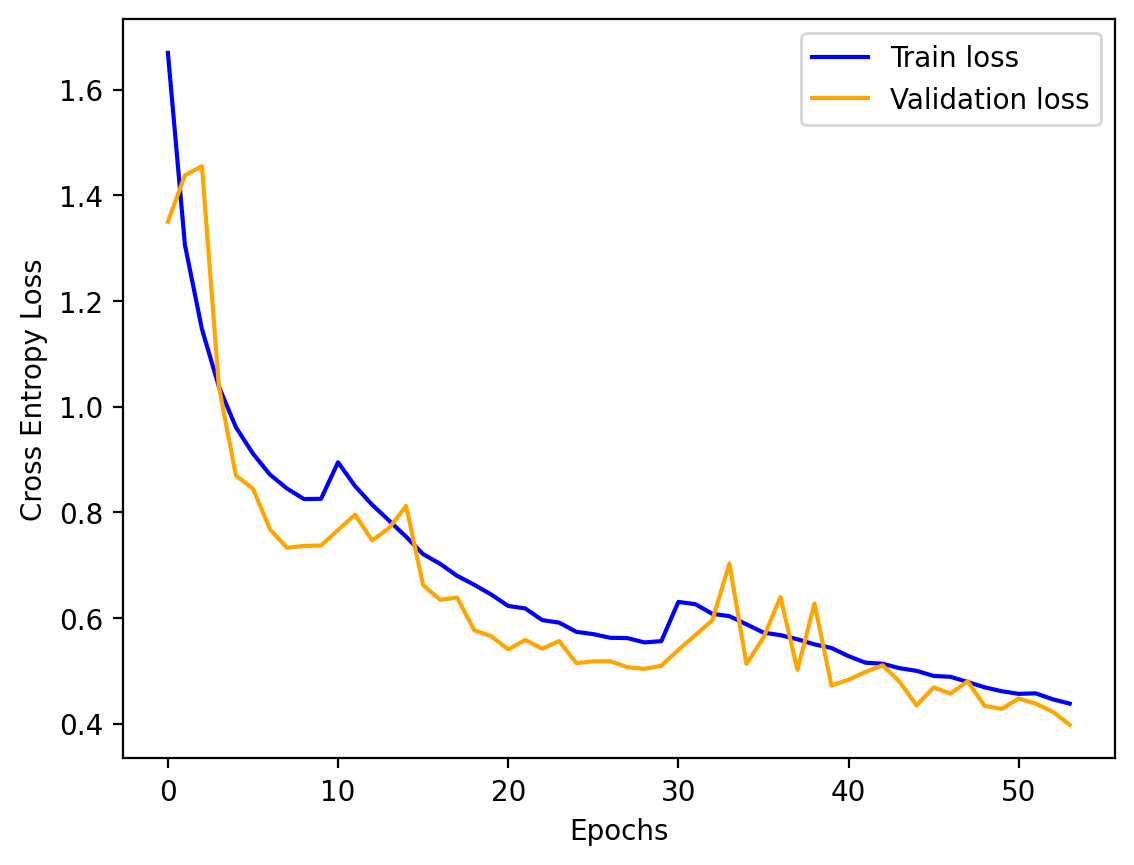

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixels
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_dropout_bn_cosine_restart()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks=callbacks)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

prefix = 'figures/vanilla_vgg_cosine_restart/' + str(acc)[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

## Exponential step decay

In [ ]:
epochs=400
def define_model_dropout_bn_exp_decay():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    schedule = ExponentialDecay(0.01,
    decay_steps=int(10 * steps),
    decay_rate=0.96)
    opt = SGD(learning_rate=schedule, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixels
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_dropout_bn_exp_decay()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks=callbacks)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

prefix = 'figures/vanilla_vgg_exp_decay/' + str(acc)[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

Epoch 1/400
781/781 [==============================] - 61s 44ms/step - loss: 1.6835 - accuracy: 0.3937 - val_loss: 1.2742 - val_accuracy: 0.5322
Epoch 2/400
781/781 [==============================] - 35s 45ms/step - loss: 1.3382 - accuracy: 0.5119 - val_loss: 1.2102 - val_accuracy: 0.5684
Epoch 3/400
781/781 [==============================] - 34s 43ms/step - loss: 1.1682 - accuracy: 0.5822 - val_loss: 1.1952 - val_accuracy: 0.5876
Epoch 4/400
781/781 [==============================] - 34s 43ms/step - loss: 1.0615 - accuracy: 0.6253 - val_loss: 0.9946 - val_accuracy: 0.6493
Epoch 5/400
781/781 [==============================] - 35s 44ms/step - loss: 0.9736 - accuracy: 0.6552 - val_loss: 0.9058 - val_accuracy: 0.6876
Epoch 6/400
781/781 [==============================] - 34s 43ms/step - loss: 0.9152 - accuracy: 0.6783 - val_loss: 0.7830 - val_accuracy: 0.7222
Epoch 7/400
781/781 [==============================] - 33s 42ms/step - loss: 0.8634 - accuracy: 0.6984 - val_loss: 0.8463 - val_ac

# Batchnorm and dropout order

## Change the order

In [ ]:
def define_model_dropout_bn_switch():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixels
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_dropout_bn_switch()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks=callbacks)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

prefix = 'figures/vanilla_vgg_switch_bn_dropout/' + str(acc)[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

Epoch 1/400
781/781 [==============================] - 30s 37ms/step - loss: 2.2861 - accuracy: 0.2195 - val_loss: 1.9044 - val_accuracy: 0.2953
Epoch 2/400
781/781 [==============================] - 26s 33ms/step - loss: 1.8233 - accuracy: 0.3221 - val_loss: 1.6672 - val_accuracy: 0.3885
Epoch 3/400
781/781 [==============================] - 28s 35ms/step - loss: 1.6650 - accuracy: 0.3790 - val_loss: 1.6347 - val_accuracy: 0.3810
Epoch 4/400
781/781 [==============================] - 26s 34ms/step - loss: 1.5895 - accuracy: 0.4097 - val_loss: 1.4318 - val_accuracy: 0.4592
Epoch 5/400
781/781 [==============================] - 28s 35ms/step - loss: 1.5356 - accuracy: 0.4353 - val_loss: 1.4578 - val_accuracy: 0.4469
Epoch 6/400
781/781 [==============================] - 27s 34ms/step - loss: 1.4860 - accuracy: 0.4552 - val_loss: 1.4080 - val_accuracy: 0.4692
Epoch 7/400
781/781 [==============================] - 26s 34ms/step - loss: 1.4475 - accuracy: 0.4731 - val_loss: 1.3543 - val_ac

## Complementarity?

In [ ]:
def define_model_bn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixels
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_bn()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks=callbacks)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

prefix = 'figures/vanilla_vgg_bn_only/' + str(acc)[:6]

summarize_diagnostics(history, prefix=prefix)

train_loss_path = prefix + 'train_loss.npy'
val_loss_path = prefix + 'val_loss.npy'
train_acc_path = prefix + 'train_acc.npy'
val_acc_path = prefix + 'val_acc.npy'

with open(train_loss_path, 'wb') as f:
    np.save(f, history.history['loss'])

with open(val_loss_path, 'wb') as f:
    np.save(f, history.history['val_loss'])

with open(train_acc_path, 'wb') as f:
    np.save(f, history.history['accuracy'])

with open(val_acc_path, 'wb') as f:
    np.save(f, history.history['val_accuracy'])

Epoch 1/400
781/781 [==============================] - 29s 34ms/step - loss: 1.5462 - accuracy: 0.4520 - val_loss: 1.3390 - val_accuracy: 0.5272
Epoch 2/400
781/781 [==============================] - 28s 36ms/step - loss: 1.2003 - accuracy: 0.5719 - val_loss: 1.1281 - val_accuracy: 0.6000
Epoch 3/400
781/781 [==============================] - 26s 33ms/step - loss: 1.0629 - accuracy: 0.6238 - val_loss: 1.0142 - val_accuracy: 0.6394
Epoch 4/400
781/781 [==============================] - 28s 36ms/step - loss: 0.9730 - accuracy: 0.6566 - val_loss: 1.0257 - val_accuracy: 0.6410
Epoch 5/400
781/781 [==============================] - 27s 34ms/step - loss: 0.9040 - accuracy: 0.6834 - val_loss: 0.9543 - val_accuracy: 0.6643
Epoch 6/400
781/781 [==============================] - 28s 36ms/step - loss: 0.8478 - accuracy: 0.7035 - val_loss: 0.8101 - val_accuracy: 0.7203
Epoch 7/400
781/781 [==============================] - 26s 34ms/step - loss: 0.7964 - accuracy: 0.7216 - val_loss: 0.8411 - val_ac

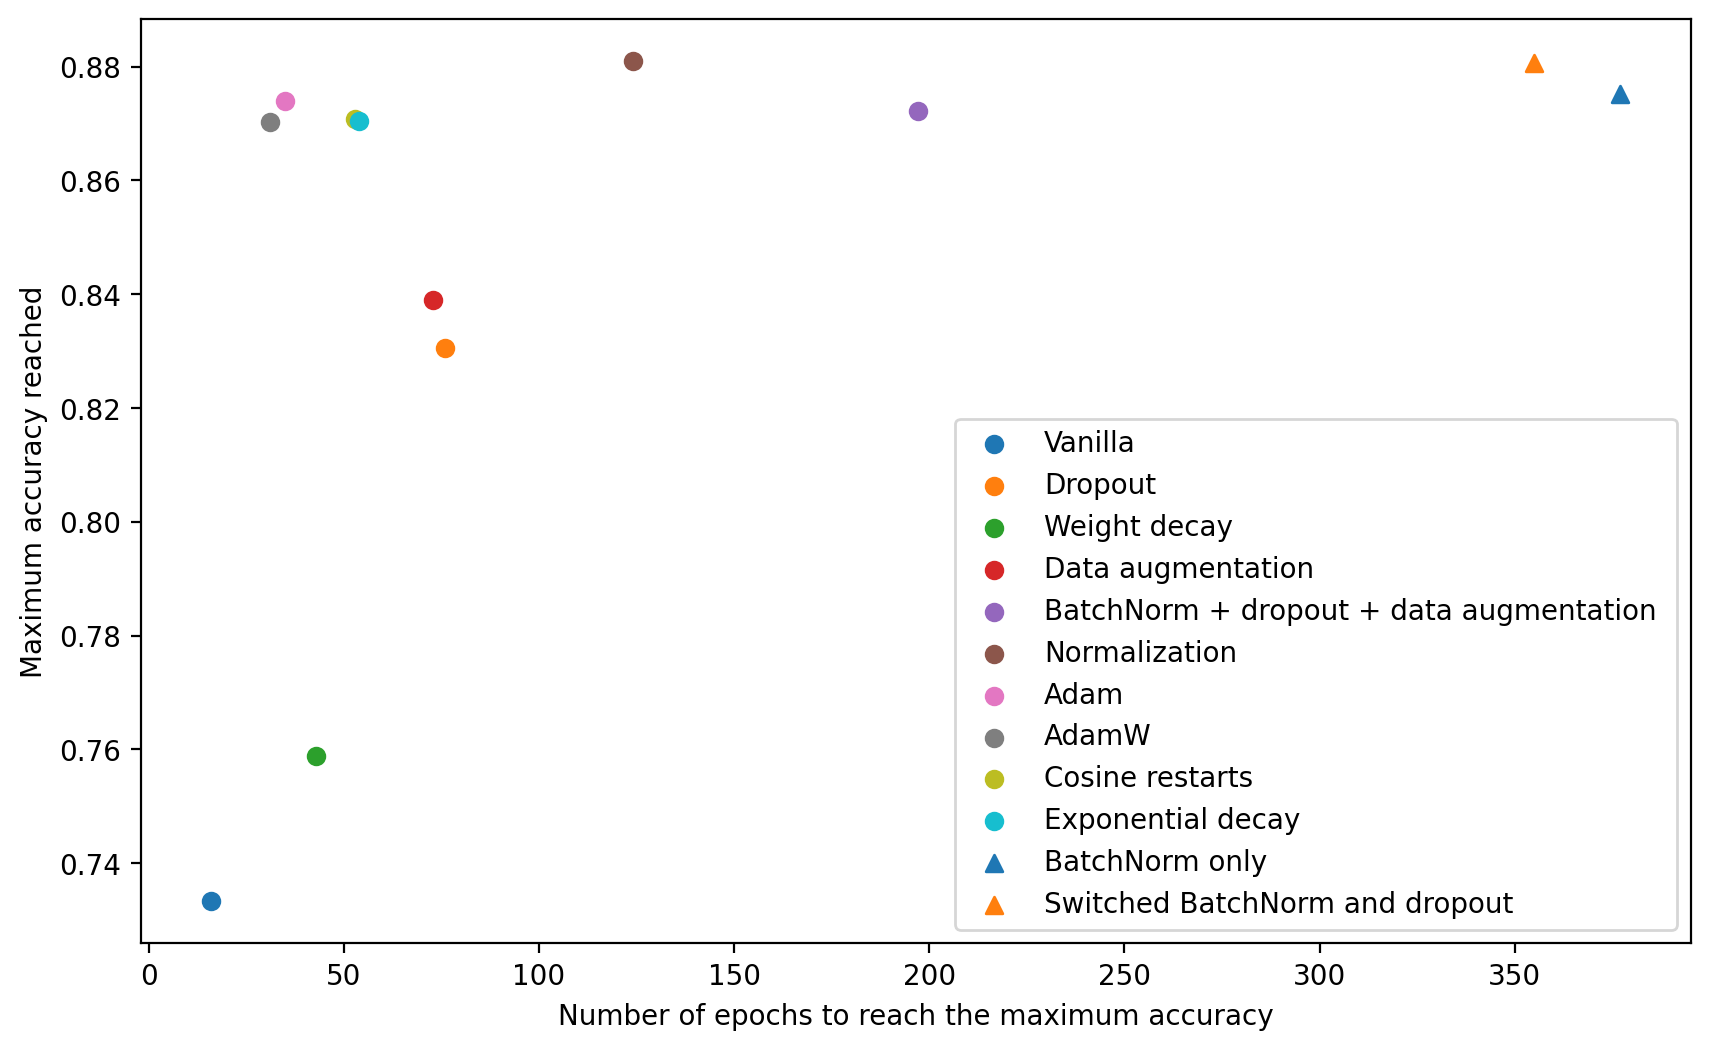

In [6]:
accuracies_adam = np.load('figures/vanilla_vgg_adam/0.8738val_acc.npy')
accuracies_adamw = np.load('figures/vanilla_vgg_adamw/0.8701val_acc.npy')
accuracies_bn_dropout_da = np.load('figures/vanilla_vgg_bn_dropout_da/0.8722val_acc.npy')
accuracies_bn_only = np.load('figures/vanilla_vgg_bn_only/0.8652val_acc.npy')
accuracies_cosine_restart = np.load('figures/vanilla_vgg_cosine_restart/0.8707val_acc.npy')
accuracies_data_augmentation = np.load('figures/vanilla_vgg_data_augmentation/0.8389val_acc.npy')
accuracies_dropout = np.load('figures/vanilla_vgg_dropout/0.82val_acc.npy')
accuracies_exp_decay = np.load('figures/vanilla_vgg_exp_decay/0.8704val_acc.npy')
accuracies_no_reg = np.load('figures/vanilla_vgg_no_reg/0.72val_acc.npy')
accuracies_norm_std = np.load('figures/vanilla_vgg_norm_stdscale/0.8809val_acc.npy')
accuracies_switch_bn_dropout = np.load('figures/vanilla_vgg_switch_bn_dropout/0.8805val_acc.npy')
accuracies_wd = np.load('figures/vanilla_vgg_wd/0.74val_acc.npy')


plt.subplots(1, 1, figsize = (10, 6))
plt.scatter(x=np.argmax(accuracies_no_reg), y=np.max(accuracies_no_reg), label='Vanilla')
plt.scatter(x=np.argmax(accuracies_dropout), y=np.max(accuracies_dropout), label='Dropout')
plt.scatter(x=np.argmax(accuracies_wd), y=np.max(accuracies_wd), label='Weight decay')
plt.scatter(x=np.argmax(accuracies_data_augmentation), y=np.max(accuracies_data_augmentation), label='Data augmentation ')
plt.scatter(x=np.argmax(accuracies_bn_dropout_da), y=np.max(accuracies_bn_dropout_da), label='BatchNorm + dropout + data augmentation ')
plt.scatter(x=np.argmax(accuracies_norm_std), y=np.max(accuracies_norm_std), label='Normalization')
plt.scatter(x=np.argmax(accuracies_adam), y=np.max(accuracies_adam[-1]), label='Adam')
plt.scatter(x=np.argmax(accuracies_adamw), y=np.max(accuracies_adamw), label='AdamW')
plt.scatter(x=np.argmax(accuracies_cosine_restart), y=np.max(accuracies_cosine_restart), label='Cosine restarts')
plt.scatter(x=np.argmax(accuracies_exp_decay), y=np.max(accuracies_exp_decay), label='Exponential decay')
plt.scatter(x=np.argmax(accuracies_bn_only), y=np.max(accuracies_bn_only), label='BatchNorm only', marker='^')
plt.scatter(x=np.argmax(accuracies_switch_bn_dropout), y=np.max(accuracies_switch_bn_dropout), label='Switched BatchNorm and dropout', marker='^')
plt.ylabel('Maximum accuracy reached')
plt.xlabel('Number of epochs to reach the maximum accuracy')
plt.legend()
plt.savefig('figures/comparison/basic_project.png')

In [ ]:
np.argwhere(accuracies_adam > 0.87).squeeze()

array(35)